In [2]:
import numpy as np  
import matplotlib.pyplot as plt

In [3]:
#data visualisation
data = np.loadtxt('beta_centre_c.txt', delimiter=' ')

In [4]:
# import scipy.stats

# mean,var=scipy.stats.distributions.norm.fit(sigma)

# x=np.linspace(sigma.min(),sigma.max())
# fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

# plt.hist(sigma, density=True)

# plt.plot(x,fitted_data,'r-')
# plt.xlabel('hydrostatic stress')
# plt.ylabel('density')
# plt.show()

In [5]:
# from scipy.stats import genextreme as gev
# x=np.linspace(epsilon.min(),epsilon.max())

# fit = gev.fit(epsilon)

# pdf = gev.pdf(x, *fit)

# plt.plot(x, pdf)

# plt.hist(epsilon, density=True)
# plt.xlabel('accumulative strain')
# plt.ylabel('density')
# print(gev.ppf(0.25,))

In [6]:
# import scipy.stats
# from scipy.stats import genextreme as gev

# mean,var=scipy.stats.distributions.norm.fit(epsilon)
# x=np.linspace(epsilon.min(),epsilon.max())

# fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

# plt.hist(epsilon,density=True)
# fit = gev.fit(epsilon)

# pdf = gev.pdf(x, *fit)

# plt.plot(x, pdf,'b-',label='extreme value distribution')

# plt.plot(x,fitted_data,'r-',label='normal distribution')
# plt.xlabel('hydrostatic stress')
# # plt.ylabel('density')
# plt.legend()
# plt.show()


In [7]:
# conda install -c conda-forge openturns

In [8]:
# import openturns as ot
# sample = ot.Sample([[p] for p in epsilon])

# gev = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
# print (gev)# mu:location, xi: shape, sigma:scale

In [9]:
# from scipy.stats import genextreme as gev
# x=np.linspace(epsilon.min(),epsilon.max())
# fit=gev.pdf(x,-0.32785,0.0150714,0.00528845)
# plt.plot(x,fit)
# plt.hist(epsilon,density=True)

In [18]:
data=np.array(data[:], copy=False, subok=True, ndmin=2).T

#data visualisation
data_2 = np.loadtxt('/home/clark/Downloads/test_cases_thesis/a_b_a/calcul.post')
sigma=np.array(data_2[:,1])# only sigma value for visulisation
epsilon=np.array(data_2[:,2])# only epsilon value
len(sigma)

#sigma=np.array(sigma[:], copy=False, subok=True, ndmin=2).T


# epsilon=np.array(epsilon[:], copy=False, subok=True, ndmin=2).T
# sigma_for_ML=np.hstack([data,sigma])# complete matrix for ML
# epsilon_for_ML=np.hstack([data,epsilon])# complete matrix for ML

31

In [40]:
from scipy.stats import norm

mean,var=scipy.stats.distributions.norm.fit(sigma)
boundary_1=norm.ppf(0.33, loc=mean, scale=var)
boundary_2=norm.ppf(0.66, loc=mean, scale=var)
# boundary_3=norm.ppf(0.75, loc=mean, scale=var)


zeros=np.zeros(20000)

sigma_zero=np.column_stack([sigma_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if sigma_zero[i,3]< boundary_1:
        sigma_zero[i,-1]=0
    elif boundary_1<sigma_zero[i,3]< boundary_2:
        sigma_zero[i,-1]=1
#     elif boundary_2<sigma_zero[i,3]< boundary_3:
#         sigma_zero[i,-1]=2
    else:
        sigma_zero[i,-1]=2
        
sigma_label=sigma_zero[:,[0,1,2,4]]
        
X_1=sigma_label[:,:3]
y_1=sigma_label[:,-1].astype(int)

# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(X_1)

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized, y_1,  test_size=0.3, train_size=0.7, stratify=y_1,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)


0.3385

In [34]:
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

mean,var=scipy.stats.distributions.norm.fit(sigma)
boundary_1=norm.ppf(0.33, loc=mean, scale=var)
boundary_2=norm.ppf(0.66, loc=mean, scale=var)
# boundary_3=norm.ppf(0.75, loc=mean, scale=var)


zeros=np.zeros(20000)

sigma_zero=np.column_stack([sigma_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if sigma_zero[i,3]< boundary_1:
        sigma_zero[i,-1]=0
    elif boundary_1<sigma_zero[i,3]< boundary_2:
        sigma_zero[i,-1]=1
#     elif boundary_2<sigma_zero[i,3]< boundary_3:
#         sigma_zero[i,-1]=2
    else:
        sigma_zero[i,-1]=2
        
sigma_label=sigma_zero[:,[0,1,2,4]]
        
X_1=sigma_label[:,:3]
y_1=sigma_label[:,-1].astype(int)

# demonstrate data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(X_1)

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized, y_1,  test_size=0.3, train_size=0.7, stratify=y_1,
                                                    random_state=1)
clf = DecisionTreeClassifier(max_depth=8)
model1 = clf.fit(X_train,y_train)
clf.score(X_test,y_test)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1000 and the array at index 1 has size 20000

Text(0, 0.5, 'data pt number')

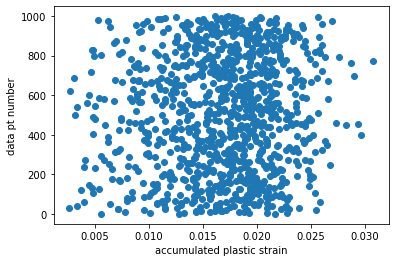

In [35]:
plt.scatter(epsilon,range(0,len(sigma)))
plt.xlabel('accumulated plastic strain')
plt.ylabel('data pt number')

In [154]:
#data labelling

boundary_1=np.percentile(sigma_for_ML[:,-1],33)
boundary_2=np.percentile(sigma_for_ML[:,-1],66)

zeros=np.zeros(20000)

sigma_zero=np.column_stack([sigma_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if sigma_zero[i,3]< boundary_1:
        sigma_zero[i,-1]=0
    elif boundary_1<sigma_zero[i,3]< boundary_2:
        sigma_zero[i,-1]=1
    else:
        sigma_zero[i,-1]=2
        
sigma_label=sigma_zero[:,[0,1,2,4]]
print(boundary_1)

255.3338079


In [155]:
boundary_3=np.percentile(epsilon_for_ML[:,-1],33)
boundary_4=np.percentile(epsilon_for_ML[:,-1],66)

epsilon_zero=np.column_stack([epsilon_for_ML,zeros])

for i in range(0,len(epsilon_for_ML[:,-1])):
    if epsilon_zero[i,3] < boundary_3:
        epsilon_zero[i,-1]=0
    elif boundary_3 < epsilon_zero[i,3]< boundary_4:
        epsilon_zero[i,-1]=1
    else:
        epsilon_zero[i,-1]=2
        
epsilon_label=epsilon_zero[:,[0,1,2,4]]

In [176]:
X=sigma_label[:,:3]
y=sigma_label[:,-1].astype(int)
sigma_zero
sigma_label

array([[306.0516, 135.5056, 122.5803,   0.    ],
       [180.2789,  56.6613, 285.5734,   3.    ],
       [ 93.3745, 104.6433, 215.7348,   2.    ],
       ...,
       [188.3531, 126.4311,  25.8441,   3.    ],
       [284.1049, 129.7504, 100.1614,   2.    ],
       [ 81.3549,  13.6967, 281.2975,   4.    ]])

In [157]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, train_size=0.7,stratify=y, random_state=1)
clf = MLPClassifier(random_state=1, max_iter=400).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

print(clf.predict(X_test))
print(y_test)

clf.score(X_test, y_test)



[0 0 0 ... 0 0 0]
[0 0 0 ... 2 2 1]
Wall time: 2.3 s


0.33016666666666666

In [158]:
X_1=epsilon_label[:,:3]
y_1=epsilon_label[:,-1].astype(int)

In [159]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,  test_size=0.3, train_size=0.7, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=400).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
print('predicte',clf.predict(X_test))
print('real',y_test)
clf.score(X_test, y_test)

predicte [2 0 2 ... 0 1 0]
real [0 1 1 ... 1 0 2]
Wall time: 2.06 s


0.4125

In [161]:
#data labelling

boundary_1=np.percentile(sigma_for_ML[:,-1],25)
boundary_2=np.percentile(sigma_for_ML[:,-1],50)
boundary_3=np.percentile(sigma_for_ML[:,-1],75)



sigma_zero=np.column_stack([sigma_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if sigma_zero[i,3]< boundary_1:
        sigma_zero[i,-1]=0
    elif boundary_1<sigma_zero[i,3]< boundary_2:
        sigma_zero[i,-1]=1
    elif boundary_2<sigma_zero[i,3]< boundary_3:
        sigma_zero[i,-1]=2
    else:
        sigma_zero[i,-1]=3
        
sigma_label=sigma_zero[:,[0,1,2,4]]

In [162]:
X_1=sigma_label[:,:3]
y_1=sigma_label[:,-1].astype(int)

In [163]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,  test_size=0.3, train_size=0.7, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)


Wall time: 2.08 s


0.25416666666666665

In [165]:
#data labelling

boundary_1=np.percentile(epsilon_for_ML[:,-1],25)
boundary_2=np.percentile(epsilon_for_ML[:,-1],50)
boundary_3=np.percentile(epsilon_for_ML[:,-1],75)

zeros=np.zeros(20000)

epsilon_zero=np.column_stack([epsilon_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if epsilon_zero[i,3]< boundary_1:
        epsilon_zero[i,-1]=0
    elif boundary_1 <epsilon_zero[i,3]< boundary_2:
        epsilon_zero[i,-1]=1
    elif boundary_2<epsilon_zero[i,3]< boundary_3:
        epsilon_zero[i,-1]=2
    else:
        epsilon_zero[i,-1]=3
        
epsilon_label=epsilon_zero[:,[0,1,2,4]]

In [166]:
X_1=epsilon_label[:,:3]
y_1=epsilon_label[:,-1].astype(int)

In [167]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,  test_size=0.3, train_size=0.7, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

Wall time: 2.7 s


0.3308333333333333

In [169]:
boundary_1=np.percentile(sigma_for_ML[:,-1],20)
boundary_2=np.percentile(sigma_for_ML[:,-1],40)
boundary_3=np.percentile(sigma_for_ML[:,-1],60)
boundary_4=np.percentile(sigma_for_ML[:,-1],80)

zeros=np.zeros(20000)

sigma_zero=np.column_stack([sigma_for_ML,zeros])
for i in range(0,len(sigma_for_ML[:,-1])):
    if sigma_zero[i,3]< boundary_1:
        sigma_zero[i,-1]=0
    elif boundary_1<sigma_zero[i,3]< boundary_2:
        sigma_zero[i,-1]=1
    elif boundary_2<sigma_zero[i,3]< boundary_3:
        sigma_zero[i,-1]=2
    elif boundary_3<sigma_zero[i,3]< boundary_4:
        sigma_zero[i,-1]=3
    else:
        sigma_zero[i,-1]=4
        
sigma_label=sigma_zero[:,[0,1,2,4]]

In [170]:
%%time
X_2=sigma_label[:,:3]
y_2=sigma_label[:,-1].astype(int)
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2,  test_size=0.3, train_size=0.7, stratify=y,
                                                    random_state=1)

clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

Wall time: 2.27 s


0.19716666666666666

In [173]:
boundary_5=np.percentile(epsilon_for_ML[:,-1],20)
boundary_6=np.percentile(epsilon_for_ML[:,-1],40)
boundary_7=np.percentile(epsilon_for_ML[:,-1],60)
boundary_8=np.percentile(epsilon_for_ML[:,-1],80)


zeros=np.zeros(20000)
epsilon_zero=np.column_stack([epsilon_for_ML,zeros])
for i in range(0,len(epsilon_for_ML[:,-1])):
    if epsilon_zero[i,3]< boundary_5:
        epsilon_zero[i,-1]=0
    elif boundary_5<epsilon_zero[i,3]< boundary_6:
        epsilon_zero[i,-1]=1
    elif boundary_6<epsilon_zero[i,3]< boundary_7:
        epsilon_zero[i,-1]=2
    elif boundary_7<epsilon_zero[i,3]< boundary_8:
        epsilon_zero[i,-1]=3
    else:
        epsilon_zero[i,-1]=4
        
epsilon_label=epsilon_zero[:,[0,1,2,4]]

In [174]:
X_4=epsilon_label[:,:3]
y_4=epsilon_label[:,-1].astype(int)

In [175]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4,  test_size=0.3, train_size=0.7, stratify=y,
                                                    random_state=1)
clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])

clf.predict(X_test[:5, :])

clf.score(X_test, y_test)

Wall time: 3.62 s


0.23533333333333334

In [94]:
# #randomlisation for cross validation

# sigma_list=sigma_label.tolist()
# epsilon_list=epsilon_label.tolist()

# # Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup

# dataset=sigma_list
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)



#print(dataset)


In [95]:
# # Find the min and max values for each column
# def dataset_minmax(dataset):
# 	minmax = list()
# 	stats = [[min(column), max(column)] for column in zip(*dataset)]
# 	return stats

# # Rescale dataset columns to the range 0-1
# def normalize_dataset(dataset, minmax):
# 	for row in dataset:
# 		for i in range(len(row)-1):
# 			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
# # Split a dataset into k folds
# def cross_validation_split(dataset, n_folds):
# 	dataset_split = list()
# 	dataset_copy = list(dataset)
# 	fold_size = int(len(dataset) / n_folds)
# 	for i in range(n_folds):
# 		fold = list()
# 		while len(fold) < fold_size:
# 			index = randrange(len(dataset_copy))
# 			fold.append(dataset_copy.pop(index))
# 		dataset_split.append(fold)
# 	return dataset_split

# # Calculate accuracy percentage
# def accuracy_metric(actual, predicted):
# 	correct = 0
# 	for i in range(len(actual)):
# 		if actual[i] == predicted[i]:
# 			correct += 1
# 	return correct / float(len(actual)) * 100.0

# # Evaluate an algorithm using a cross validation split
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
# 	folds = cross_validation_split(dataset, n_folds)
# 	scores = list()
# 	for fold in folds:
# 		train_set = list(folds)
# 		train_set.remove(fold)
# 		train_set = sum(train_set, [])
# 		test_set = list()
# 		for row in fold:
# 			row_copy = list(row)
# 			test_set.append(row_copy)
# 			row_copy[-1] = None
# 		predicted = algorithm(train_set, test_set, *args)
# 		actual = [row[-1] for row in fold]
# 		accuracy = accuracy_metric(actual, predicted)
# 		scores.append(accuracy)
# 	return scores

# # Calculate neuron activation for an input
# def activate(weights, inputs):
# 	activation = weights[-1] # as the bias
# 	for i in range(len(weights)-1):
# 		activation += weights[i] * inputs[i]
# 	return activation

# # Transfer neuron activation
# def transfer(activation):
# 	return 1.0 / (1.0 + exp(-activation))

# # Forward propagate input to a network output
# def forward_propagate(network, row):
# 	inputs = row
# 	for layer in network:
# 		new_inputs = []
# 		for neuron in layer:
# 			activation = activate(neuron['weights'], inputs)
# 			neuron['output'] = transfer(activation)
# 			new_inputs.append(neuron['output'])
# 		inputs = new_inputs
# 	return inputs

# # Calculate the derivative of an neuron output
# def transfer_derivative(output):
# 	return output * (1.0 - output)

# # Backpropagate error and store in neurons
# def backward_propagate_error(network, expected):
# 	for i in reversed(range(len(network))):
# 		layer = network[i]
# 		errors = list()
# 		if i != len(network)-1:
# 			for j in range(len(layer)):
# 				error = 0.0
# 				for neuron in network[i + 1]:
# 					error += (neuron['weights'][j] * neuron['delta'])
# 				errors.append(error)
# 		else:
# 			for j in range(len(layer)):
# 				neuron = layer[j]
# 				errors.append(expected[j] - neuron['output'])
# 		for j in range(len(layer)):
# 			neuron = layer[j]
# 			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# # Update network weights with error
# def update_weights(network, row, l_rate):
# 	for i in range(len(network)):
# 		inputs = row[:-1]
# 		if i != 0:
# 			inputs = [neuron['output'] for neuron in network[i - 1]]
# 		for neuron in network[i]:
# 			for j in range(len(inputs)):
# 				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
# 			neuron['weights'][-1] += l_rate * neuron['delta']

# # Train a network for a fixed number of epochs
# def train_network(network, train, l_rate, n_epoch, n_outputs):
# 	for epoch in range(n_epoch):
# 		for row in train:
# 			outputs = forward_propagate(network, row)
# 			expected = [0 for i in range(n_outputs)]
# 			expected[row[-1]] = 1
# 			backward_propagate_error(network, expected)
# 			update_weights(network, row, l_rate)

# # Initialize a network
# def initialize_network(n_inputs, n_hidden, n_outputs):
# 	network = list()
# 	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
# 	network.append(hidden_layer)
# 	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
# 	network.append(output_layer)
# 	return network

# # Make a prediction with a network
# def predict(network, row):
# 	outputs = forward_propagate(network, row)
# 	return outputs.index(max(outputs))

# # Backpropagation Algorithm With Stochastic Gradient Descent
# def back_propagation(train, test, l_rate, n_epoch, n_hidden):
# 	n_inputs = len(train[0]) - 1
# 	n_outputs = len(set([row[-1] for row in train]))
# 	network = initialize_network(n_inputs, n_hidden, n_outputs)
# 	train_network(network, train, l_rate, n_epoch, n_outputs)
# 	predictions = list()
# 	for row in test:
# 		prediction = predict(network, row)
# 		predictions.append(prediction)
# 	return(predictions)


# # evaluate algorithm
# n_folds = 3
# l_rate = 0.2
# n_epoch = 500
# n_hidden = 5
# scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


In [96]:
# #randomlisation for cross validation

# # Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup

# dataset=epsilon_list
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)

# print(dataset)

In [ ]:
# # Find the min and max values for each column
# def dataset_minmax(dataset):
# 	minmax = list()
# 	stats = [[min(column), max(column)] for column in zip(*dataset)]
# 	return stats

# # Rescale dataset columns to the range 0-1
# def normalize_dataset(dataset, minmax):
# 	for row in dataset:
# 		for i in range(len(row)-1):
# 			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            
# # Split a dataset into k folds
# def cross_validation_split(dataset, n_folds):
# 	dataset_split = list()
# 	dataset_copy = list(dataset)
# 	fold_size = int(len(dataset) / n_folds)
# 	for i in range(n_folds):
# 		fold = list()
# 		while len(fold) < fold_size:
# 			index = randrange(len(dataset_copy))
# 			fold.append(dataset_copy.pop(index))
# 		dataset_split.append(fold)
# 	return dataset_split

# # Calculate accuracy percentage
# def accuracy_metric(actual, predicted):
# 	correct = 0
# 	for i in range(len(actual)):
# 		if actual[i] == predicted[i]:
# 			correct += 1
# 	return correct / float(len(actual)) * 100.0

# # Evaluate an algorithm using a cross validation split
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
# 	folds = cross_validation_split(dataset, n_folds)
# 	scores = list()
# 	for fold in folds:
# 		train_set = list(folds)
# 		train_set.remove(fold)
# 		train_set = sum(train_set, [])
# 		test_set = list()
# 		for row in fold:
# 			row_copy = list(row)
# 			test_set.append(row_copy)
# 			row_copy[-1] = None
# 		predicted = algorithm(train_set, test_set, *args)
# 		actual = [row[-1] for row in fold]
# 		accuracy = accuracy_metric(actual, predicted)
# 		scores.append(accuracy)
# 	return scores

# # Calculate neuron activation for an input
# def activate(weights, inputs):
# 	activation = weights[-1]
# 	for i in range(len(weights)-1):
# 		activation += weights[i] * inputs[i]
# 	return activation

# # Transfer neuron activation
# def transfer(activation):
# 	return 1.0 / (1.0 + exp(-activation))

# # Forward propagate input to a network output
# def forward_propagate(network, row):
# 	inputs = row
# 	for layer in network:
# 		new_inputs = []
# 		for neuron in layer:
# 			activation = activate(neuron['weights'], inputs)
# 			neuron['output'] = transfer(activation)
# 			new_inputs.append(neuron['output'])
# 		inputs = new_inputs
# 	return inputs

# # Calculate the derivative of an neuron output
# def transfer_derivative(output):
# 	return output * (1.0 - output)

# # Backpropagate error and store in neurons
# def backward_propagate_error(network, expected):
# 	for i in reversed(range(len(network))):
# 		layer = network[i]
# 		errors = list()
# 		if i != len(network)-1:
# 			for j in range(len(layer)):
# 				error = 0.0
# 				for neuron in network[i + 1]:
# 					error += (neuron['weights'][j] * neuron['delta'])
# 				errors.append(error)
# 		else:
# 			for j in range(len(layer)):
# 				neuron = layer[j]
# 				errors.append(expected[j] - neuron['output'])
# 		for j in range(len(layer)):
# 			neuron = layer[j]
# 			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# # Update network weights with error
# def update_weights(network, row, l_rate):
# 	for i in range(len(network)):
# 		inputs = row[:-1]
# 		if i != 0:
# 			inputs = [neuron['output'] for neuron in network[i - 1]]
# 		for neuron in network[i]:
# 			for j in range(len(inputs)):
# 				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
# 			neuron['weights'][-1] += l_rate * neuron['delta']

# # Train a network for a fixed number of epochs
# def train_network(network, train, l_rate, n_epoch, n_outputs):
# 	for epoch in range(n_epoch):
# 		for row in train:
# 			outputs = forward_propagate(network, row)
# 			expected = [0 for i in range(n_outputs)]
# 			expected[row[-1]] = 1
# 			backward_propagate_error(network, expected)
# 			update_weights(network, row, l_rate)

# # Initialize a network
# def initialize_network(n_inputs, n_hidden, n_outputs):
# 	network = list()
# 	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
# 	network.append(hidden_layer)
# 	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
# 	network.append(output_layer)
# 	return network

# # Make a prediction with a network
# def predict(network, row):
# 	outputs = forward_propagate(network, row)
# 	return outputs.index(max(outputs))

# # Backpropagation Algorithm With Stochastic Gradient Descent
# def back_propagation(train, test, l_rate, n_epoch, n_hidden):
# 	n_inputs = len(train[0]) - 1
# 	n_outputs = len(set([row[-1] for row in train]))
# 	network = initialize_network(n_inputs, n_hidden, n_outputs)
# 	train_network(network, train, l_rate, n_epoch, n_outputs)
# 	predictions = list()
# 	for row in test:
# 		prediction = predict(network, row)
# 		predictions.append(prediction)
# 	return(predictions)


# # evaluate algorithm
# n_folds = 3
# l_rate = 0.05
# n_epoch = 500
# n_hidden = 3
# scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
# print('Scores: %s' % scores)
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

In [ ]:
# #randomlisation for cross validation

# sigma_processed=np.random.permutation(sigma_label)
# epsilon_processed=np.random.permutation(epsilon_label)
# sigma_list=sigma_processed.tolist()

# # Convert string column to integer
# def str_column_to_int(dataset, column):
# 	class_values = [row[column] for row in dataset]
# 	unique = set(class_values)
# 	lookup = dict()
# 	for i, value in enumerate(unique):
# 		lookup[value] = i
# 	for row in dataset:
# 		row[column] = lookup[row[column]]
# 	return lookup

# dataset=sigma_list
# # convert class column to integers
# str_column_to_int(dataset, len(dataset[0])-1)

# print(dataset)

In [ ]:
# for i in range(0,3):
#     normalised=np.divide(np.subtract(sigma_ordered[:,i],np.mean(sigma_ordered[:,i])),np.std(sigma_ordered[:,i]))
#     sigma_ordered[:,i]=normalised
# print(sigma_ordered)

# zeros=np.zeros(1000)

# sigma_label=np.column_stack([sigma_ordered[:,:3],zeros])
# sigma_label[:334,-1]=1
# sigma_label[334:667,-1]=2
# sigma_label[667:1001,-1]=3

# epsilon_label=np.column_stack([epsilon_ordered[:,:3],zeros])
# epsilon_label[:301,-1]=1
# epsilon_label[301:701,-1]=2
# epsilon_label[701:1001,-1]=3



# print(sigma_label)

In [ ]:
# #data label & normalisation

# sigma_ordered=sigma_for_ML[sigma_for_ML[:,-1].argsort()] 
# epsilon_ordered=epsilon_for_ML[epsilon_for_ML[:,-1].argsort()]
# for i in range(0,3):
#     normalised=np.divide(np.subtract(sigma_for_ML[:,i],np.mean(sigma_for_ML[:,i])),np.std(sigma_for_ML[:,i]))
#     sigma_for_ML[:,i]=normalised